In [1]:
import os
# Set the environment variable
#os.environ['STPSF_PATH'] = os.path.abspath("stpsf_data")
#os.environ['WEBBPSF_EXT_PATH'] = os.path.abspath("stpsf_data")
#os.environ['PYSYN_CDBS'] = os.path.abspath("webbpsf_ext_data/cdbs")
#os.environ['CRDS_PATH'] = os.path.abspath("crds_cache")
#os.environ['CRDS_SERVER_URL'] = "https://jwst-crds.stsci.edu"

# Verify the variable is set
print("STPSF_PATH:", os.environ['STPSF_PATH'])
print("WEBBPSF_EXT_PATH:", os.environ['WEBBPSF_EXT_PATH'])
print("PYSYN_CDBS:", os.environ['PYSYN_CDBS'])
print("CRDS_PATH:", os.environ['CRDS_PATH'])

STPSF_PATH: /home/yuchialin/JWST/stpsf_data
WEBBPSF_EXT_PATH: /home/yuchialin/JWST/stpsf_data
PYSYN_CDBS: /home/yuchialin/JWST/webbpsf_ext_data/cdbs
CRDS_PATH: /home/yuchialin/JWST/crds_cache


In [2]:
import os
import numpy as np
import subprocess

import spaceKLIP

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

import webbpsf_ext
webbpsf_ext.setup_logging('WARN', verbose=False)

In [3]:
data_root = 'data_nircam_twhya'

In [4]:
# Name the root directory where we will keep the data for this tutorial.
filt = 'F187N'  # Set to None to disable filter selection and load all filters.

In [5]:
# Initialize spaceKLIP database.
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'uncal'),
                                    output_dir=data_root,
                                    filt=filt,
                                    pid=None)

2025-07-28 06:06:37,980 - CRDS - INFO -  Calibration SW Found: jwst 1.17.1 (/home/yuchialin/miniconda3/envs/spaceklip/lib/python3.11/site-packages/jwst-1.17.1.dist-info)


[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... PIXAR_SR BUNIT      ROLL_REF      BLURFWHM
---- --------- -------- -------- ... -------- ----- ------------------ --------
 SCI NRC_CORON   STAGE0     JWST ...      nan    DN  332.1522064841713      nan
 SCI NRC_CORON   STAGE0     JWST ...      nan    DN  342.1516306312728      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 207.39726348213995      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 207.39725825399324      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 207.39724717935945      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 207.39722369308888      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 207.39724322101685      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 207.39725189279812      nan
 REF NRC_CORON   STAGE0     JWST ...  

In [6]:
database.summarize()

NIRCAM_F187N_MASK335R
	STAGE0: 22 files;	2 SCI, 20 REF


In [9]:
# COMPREHENSIVE SUMMARY OF REFERENCE IMAGES AND STARS
print("="*60)
print("REFERENCE IMAGES AND STARS ANALYSIS")
print("="*60)

# Get the data
concat_key = 'JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R'
table = database.obs[concat_key]
df = table.to_pandas()

# Basic counts
total_ref = len(df[df['TYPE'] == 'REF'])
total_sci = len(df[df['TYPE'] == 'SCI'])

print(f"TOTAL IMAGES:")
print(f"  • Reference images: {total_ref}")
print(f"  • Science images: {total_sci}")
print(f"  • Total: {total_ref + total_sci}")
print()

# Reference star analysis
ref_df = df[df['TYPE'] == 'REF']
ref_star_counts = ref_df['TARGPROP'].value_counts()

print(f"REFERENCE STARS:")
print(f"  • Number of different reference stars: {len(ref_star_counts)}")
print(f"  • Reference star breakdown:")
for i, (star, count) in enumerate(ref_star_counts.items(), 1):
    percentage = (count/total_ref)*100
    print(f"    {i}. {star}: {count} images ({percentage:.1f}%)")
print()

# Science target
sci_df = df[df['TYPE'] == 'SCI']
sci_targets = sci_df['TARGPROP'].unique()
print(f"SCIENCE TARGET:")
print(f"  • Target name: {sci_targets[0]}")
print(f"  • Number of science images: {total_sci}")
print()

# Observation setup
print(f"OBSERVATION DETAILS:")
print(f"  • Filter: {df['FILTER'].iloc[0]}")
print(f"  • Coronagraph mask: {df['CORONMSK'].iloc[0]}")
print(f"  • Pupil mask: {df['PUPIL'].iloc[0]}")
print(f"  • Detector: {df['DETECTOR'].iloc[0]}")
print(f"  • Subarray: {df['SUBARRAY'].iloc[0]}")
print()

# Program IDs (from filenames)
ref_program_ids = set()
sci_program_ids = set()

for filename in ref_df['FITSFILE']:
    # Extract program ID from filename (format: jw[PROGRAM_ID]...)
    program_id = filename.split('/')[-1].split('_')[0][2:7]  # Remove 'jw' prefix
    ref_program_ids.add(program_id)

for filename in sci_df['FITSFILE']:
    program_id = filename.split('/')[-1].split('_')[0][2:7]
    sci_program_ids.add(program_id)

print(f"PROGRAM IDs:")
print(f"  • Reference observations from program(s): {', '.join(sorted(ref_program_ids))}")
print(f"  • Science observations from program(s): {', '.join(sorted(sci_program_ids))}")

print("="*60)

REFERENCE IMAGES AND STARS ANALYSIS
TOTAL IMAGES:
  • Reference images: 20
  • Science images: 2
  • Total: 22

REFERENCE STARS:
  • Number of different reference stars: 1
  • Reference star breakdown:
    1. P330-E-OFFSET: 20 images (100.0%)

SCIENCE TARGET:
  • Target name: TW-HYA
  • Number of science images: 2

OBSERVATION DETAILS:
  • Filter: F187N
  • Coronagraph mask: MASK335R
  • Pupil mask: MASKRND
  • Detector: NRCA2
  • Subarray: SUB320A335R

PROGRAM IDs:
  • Reference observations from program(s): 04498, 06606
  • Science observations from program(s): 01179


In [7]:
spaceKLIP.coron1pipeline.run_obs(database=database,
                       steps={'group_scale': {'skip': False},
                              'dq_init': {'skip': False},
                              'saturation': {'n_pix_grow_sat': 1,
                                             'grow_diagonal': False},
                              'ipc': {'skip': True},
                              'superbias':{'skip': False},
                              'refpix': {'odd_even_columns': True,
                                         'odd_even_rows': True,
                                         'nlower': 4,
                                         'nupper': 4,
                                         'nleft': 4,
                                         'nright': 4,
                                         'nrow_off': 0,
                                         'ncol_off': 0},
                              'linearity': {'skip': False},
                              'dark_current': {'skip': True},
                              'persistence': {'skip': True},
                              'jump': {'rejection_threshold': 4.,
                                       'three_group_rejection_threshold': 4.,
                                       'four_group_rejection_threshold': 4.,
                                       'maximum_cores': 'all'},
                              'subtract_1overf': {'model_type': 'savgol',
                                                  'sat_frac': 0.5,
                                                  'combine_ints': True,
                                                  'vertical_corr': True,
                                                  'nproc': 4},
                              'ramp_fit': {'save_calibrated_ramp': False,
                                          'maximum_cores': 'all'},
                              'gain_scale': {'skip': False}},
                       subdir='stage1')

[spaceKLIP.coron1pipeline:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw01179005001_03106_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw01179008001_03106_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw04498049001_0310b_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw04498049001_0310b_00002_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw04498049001_0310b_00003_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw04498049001_0310b_00004_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw04498049001_0310b_00005_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw04498049001_0310d_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]  

In [8]:
database.summarize()

NIRCAM_F187N_MASK335R
	STAGE1: 22 files;	2 SCI, 20 REF


In [9]:
import spaceKLIP.__init__
print(spaceKLIP.__init__.__version__)

2.1.1.dev111+g6e5b1f9


In [10]:
spaceKLIP.plotting.display_coron_dataset(
    database,
    restrict_to={
        'FILTER': filt,  # Sort by filter.
        'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    vmin=0, vmax=1e3,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_f187N_stage1.pdf'  # Save plots to PDF.
)

IntSlider(value=0, description='Image  Index:', max=1)

Output()

In [11]:
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'stage1'),
                                    file_type='rateints.fits',
                                    output_dir=data_root,
                                    filt=filt,
                                    pid=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... PIXAR_SR BUNIT      ROLL_REF      BLURFWHM
---- --------- -------- -------- ... -------- ----- ------------------ --------
 SCI NRC_CORON   STAGE1     JWST ...      nan  DN/s  332.1522064841713      nan
 SCI NRC_CORON   STAGE1     JWST ...      nan  DN/s  342.1516306312728      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 207.39726348213995      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 207.39725825399324      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 207.39724717935945      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 207.39722369308888      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 207.39724322101685      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 207.39725189279812      nan
 REF NRC_CORON   STAGE1     JWST ...  

In [12]:
spaceKLIP.coron2pipeline.run_obs(database=database,
                                steps={'bkg_subtract': {'skip': False},
                                       'assign_wcs': {'skip': False},
                                       'flat_field': {'skip': False},
                                       'photom': {'skip': False},
                                       'outlier_detection': {'skip': False}},
                                subdir='stage2')

[spaceKLIP.coron2pipeline:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw01179005001_03106_00001_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw01179008001_03106_00001_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw04498049001_0310b_00001_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw04498049001_0310b_00002_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw04498049001_0310b_00003_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw04498049001_0310b_00004_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw04498049001_0310b_00005_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw04498049001_0310d_00001_nrca2_rateints.fits
[spaceKLI

In [13]:
database.summarize()

NIRCAM_F187N_MASK335R
	STAGE2: 22 files;	2 SCI, 20 REF


In [14]:
spaceKLIP.plotting.display_coron_dataset(
    database,
    restrict_to={
        'FILTER': filt,  # Sort by filter.
        'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    vmin=0, vmax=1e3,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_f187N_stage2.pdf'  # Save plots to PDF.
)

IntSlider(value=0, description='Image  Index:', max=1)

Output()

In [15]:
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'stage2'),
                                    file_type='calints.fits',
                                    output_dir=data_root,
                                    filt=filt,
                                    pid=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT       ROLL_REF      BLURFWHM
---- --------- -------- -------- ... ------ ------------------ --------
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  332.1522064841713      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  342.1516306312728      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39726348213995      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39725825399324      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39724717935945      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39722369308888      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39724322101685      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39725189279812      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 207.39726631394745      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  2

In [16]:
# Initialize spaceKLIP image manipulation tools class.
imageTools = spaceKLIP.imagetools.ImageTools(database=database)


In [17]:
# Median-subtract each frame to mitigate uncalibrated bias drifts.
imageTools.subtract_median(types=['SCI', 'SCI_TA', 'SCI_BG', 'REF', 'REF_TA', 'REF_BG'],
                           subdir='medsub')

[spaceKLIP.imagetools:INFO] Median subtraction using method=border
[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 2.17
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw01179008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 1.59
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04498049001_0310b_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = -1.09
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04498049001_0310b_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = -5.88
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04498049001_0310b_00003_nrca2_calints.fits
[spaceKLI

In [18]:
# Compare before and after median subtraction.

spaceKLIP.plotting.display_image_comparisons(
    database,
    ['stage2', 'medsub'],  # Subdirectories to look for files in.
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    vmin=0, vmax=10,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_medsub_f187N_comparison.pdf')

IntSlider(value=0, description='Image Index:', max=1)

Output()

In [19]:
# Fix bad pixels using custom spaceKLIP routines. Multiple routines can be
# combined in a custom order by joining them with a + sign.
# - sigclip: use sigma clipping to find additional bad pixels.
# - custom: use custom map to find additional bad pixels.
# - timemed: replace pixels which are only bad in some frames with their
#            median value from the good frames.
# - localmed: replace bad pixels with the median of surrounding good
#            pixels.
# - medfilt: replace bad pixels with an image plane median filter.

# - shift_x/y: Define the range of pixel shifts (left/right and up/down)
# used in sigma clipping to compare a pixel with its neighbors and identify deviations.

imageTools.fix_bad_pixels(method='sigclip+timemed+localmed+medfilt',
                          sigclip_kwargs={'sigclip': 3,
                                          'shift_x': [-3, 0, 3],
                                          'shift_y': [-3, 0, 3]},
                          custom_kwargs={},
                          timemed_kwargs={},
                          localmed_kwargs={'shift_x': [-1, 0, 1],
                                        'shift_y': [-1, 0, 1]},
                          medfilt_kwargs={'size': 4},
                          subdir='bpcleaned')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Method sigclip: jw01179005001_03106_00001_nrca2_calints.fits
Frame 16/16, iteration 4
[spaceKLIP.imagetools:INFO]   --> Method sigclip: identified 245399 additional bad pixel(s) -- 14.98%
[spaceKLIP.imagetools:INFO]   --> Method timemed: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method timemed: fixing 245269 bad pixel(s) -- 14.97%
[spaceKLIP.imagetools:INFO]   --> Method localmed: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method localmed: fixing 4480 bad pixel(s) -- 0.27%
[spaceKLIP.imagetools:INFO]   --> Method medfilt: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method medfilt: fixing 0 bad pixel(s) -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Method sigclip: jw01179008001_03106_00001_nrca2_calints.fits
Frame 16/16, iteration 4
[spaceKLIP.imagetool

In [20]:
# Compare how well each cleaning method did to replace bad pixels.

spaceKLIP.plotting.display_image_comparisons(
    database,
    ['medsub', 'bpcleaned'],  # Subdirectories to look for files in.
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    vmin=0, vmax=10, # Define the min/max values for consistent image scaling.
    save_filename='twhya_clean_bp_f187N_comparison.pdf')

IntSlider(value=0, description='Image Index:', max=1)

Output()

In [21]:
# This changes only the mask center information in the database table.
# No change in the observed data.
imageTools.update_nircam_centers()

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (159.83, 156.62)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw01179008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (159.83, 156.62)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04498049001_0310b_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> 

[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04498049001_0310d_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (159.83, 156.62)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04498049001_0310d_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (159.83, 156.62)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04498049001_0310d_00003_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (159.83, 156.62)
[spaceKLIP.image

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: generating WebbPSF image for absolute centering (this might take a while)
[spaceKLIP.psf:INFO] Generating on-axis and off-axis PSFs...
[spaceKLIP.psf:INFO]   Done.
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 0 and coronagraph center (dx, dy) = (0.051, 0.765) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 1 and coronagraph center (dx, dy) = (0.020, 0.770) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 2 and coronagraph center (dx, dy) = (0.013, 0.759) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 3 and coronagraph center (dx, dy) = (0.031, 0.762) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset

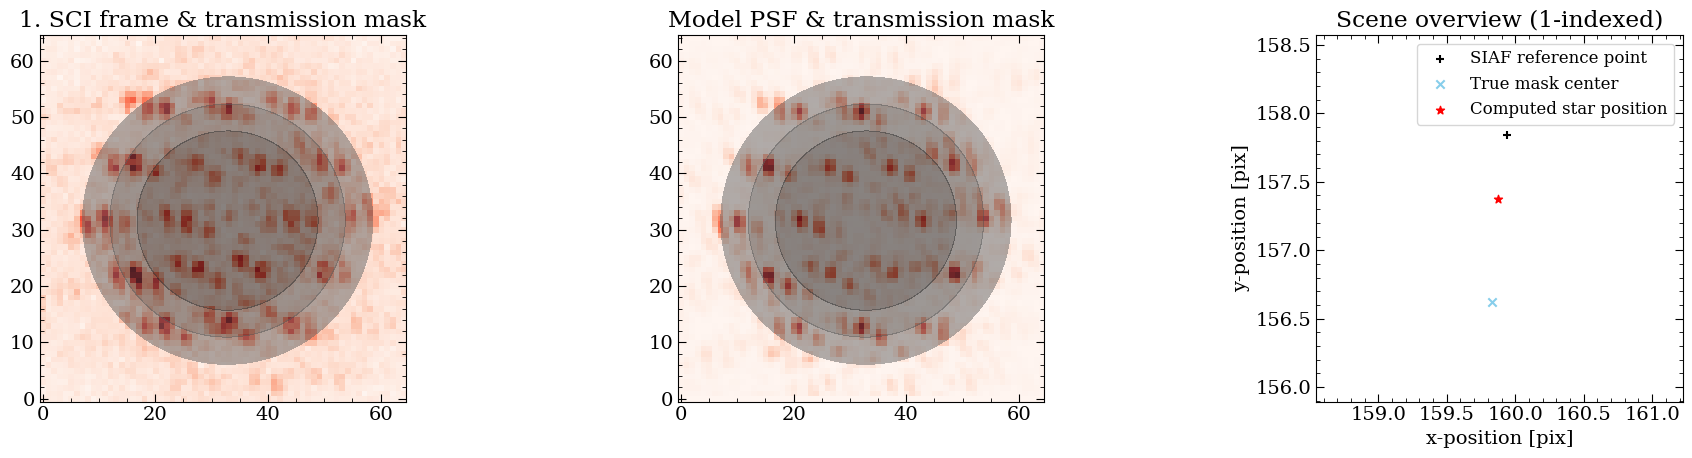

[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 97.82 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 97.82 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04498049001_0310b_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04498049001_0310b_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 97.82 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04498049001_0310b_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04498049001_0310b_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift 

In [22]:
imageTools.recenter_frames(spectral_type='M0V')

# The spectral type is used to make a more accurate PSF simulation for the star.
# This step changes the pixel data in the first science frame to center it.
# The other subsequent frames are shifted identically. I.e. the shift to center
# the first SCI frame is applied to all SCI and REF frames.

In [23]:
!ls data_nircam_twhya/recentered/*pdf

data_nircam_twhya/recentered/jw01179005001_03106_00001_nrca2_calints.pdf


[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Align frames: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 0.51 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw01179008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 10.14 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw04498049001_0310b_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 2.76 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw04498049001_0310b_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 5.03 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw04498049001_0310b_00003_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 1.45 mas
[spaceKLIP.imagetools:INFO]   

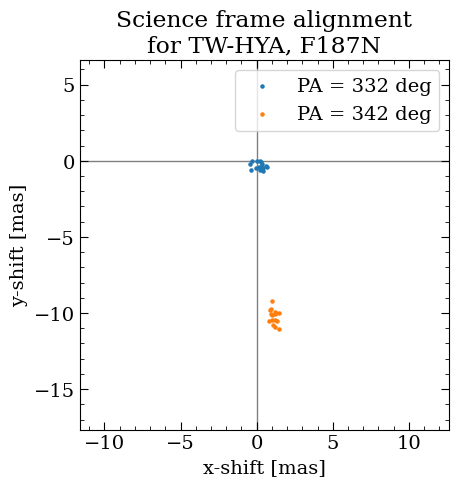

[spaceKLIP.imagetools:INFO]  Plot saved in data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R_align_ref.pdf


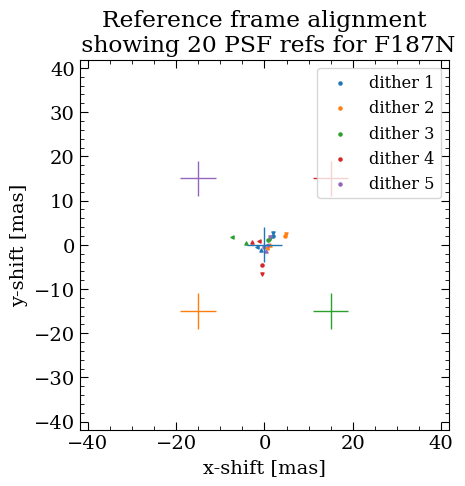

In [24]:
# Align Frames Use image registration to align all frames in a concatenation to the
# first science frame in that concatenation.
imageTools.align_frames(method='fourier',
                        kwargs={},
                        subdir='aligned')

In [25]:
# This step also outputs plots that show the results of the alignment.
!ls data_nircam_twhya/aligned/*pdf

data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R_align_ref.pdf
data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R_align_sci.pdf


In [34]:
# Compare how well recentering and alignment did.

spaceKLIP.plotting.display_image_comparisons(
    database,
    ['recentered', 'aligned'],  # Subdirectories to look for files in.
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI', 'REF']  # Sort by file type SCI/REF.
    },
    subtract_first=True,  # Subtract the first science frame to check alignment.
    interactive=True,  # Static or interactive plots?
    # Define the min/max/stretch values for consistent image scaling.
    # vmin=-0.5, vmax=0.5, stretch=0.05,
    save_filename='twhya_recenter_vs_align_f187N_comparison.pdf')

IntSlider(value=1, description='Image Index:', max=21, min=1)

Output()

In [27]:
# Pad all frames.
imageTools.pad_frames(npix=80,
                      cval=np.nan,
                      types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                      subdir='padded')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw01179005001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw01179008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw04498049001_0310b_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw04498049001_0310b_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw04498049001_0310b_

In [28]:
spaceKLIP.plotting.display_coron_dataset(
    database,
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Set to False for static plots.
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    bbox_color=None,  # Remove background text boxes.
    save_filename='twhya_f187N_stage2_cleaned.pdf'  # Save plots to PDF.
)

IntSlider(value=0, description='Image  Index:', max=1)

Output()

In [29]:
# Run pyKLIP pipeline. Additional parameters for klip_dataset function can
# be passed using kwargs parameter.
spaceKLIP.pyklippipeline.run_obs(database=database,
                       kwargs={'mode': ['ADI', 'RDI', 'ADI+RDI'],
                               'annuli': [1],
                               'subsections': [1],
                               'numbasis': [1, 2, 5, 10, 20, 50],
                               'algo': 'klip',
                               'save_rolls': True},
                       subdir='klipsub')

[spaceKLIP.pyklippipeline:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = ADI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 1.874e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1


  0%|          | 0/1 [00:00<?, ?it/s]

Closing threadpool
Derotating Images...
Writing Images to directory /home/yuchialin/JWST/twhya/187N/data_nircam_twhya/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(6, 32, 1, 480, 480)
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = RDI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 1.874e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1


  0%|          | 0/1 [00:00<?, ?it/s]

Closing threadpool
Derotating Images...
Writing Images to directory /home/yuchialin/JWST/twhya/187N/data_nircam_twhya/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(6, 32, 1, 480, 480)
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = ADI+RDI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 1.874e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1


  0%|          | 0/1 [00:00<?, ?it/s]

Closing threadpool
Derotating Images...
Writing Images to directory /home/yuchialin/JWST/twhya/187N/data_nircam_twhya/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(6, 32, 1, 480, 480)
[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS    KLMODES     BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- -------------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan


In [30]:
database.summarize()

NIRCAM_F187N_MASK335R
	STAGE2: 22 files;	2 SCI, 20 REF
	STAGE3: 3 files;	3 PYKLIP


In [31]:
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'klipsub'),
                                    file_type='*KLmodes-all.fits',
                                    output_dir=data_root,
                                    readlevel=3,
                                    pid=1179)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F187N_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS    KLMODES     BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- -------------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan


In [32]:
database.summarize()

NIRCAM_F187N_MASK335R
	STAGE2: 22 files;	2 SCI, 20 REF
	STAGE3: 3 files;	3 PYKLIP


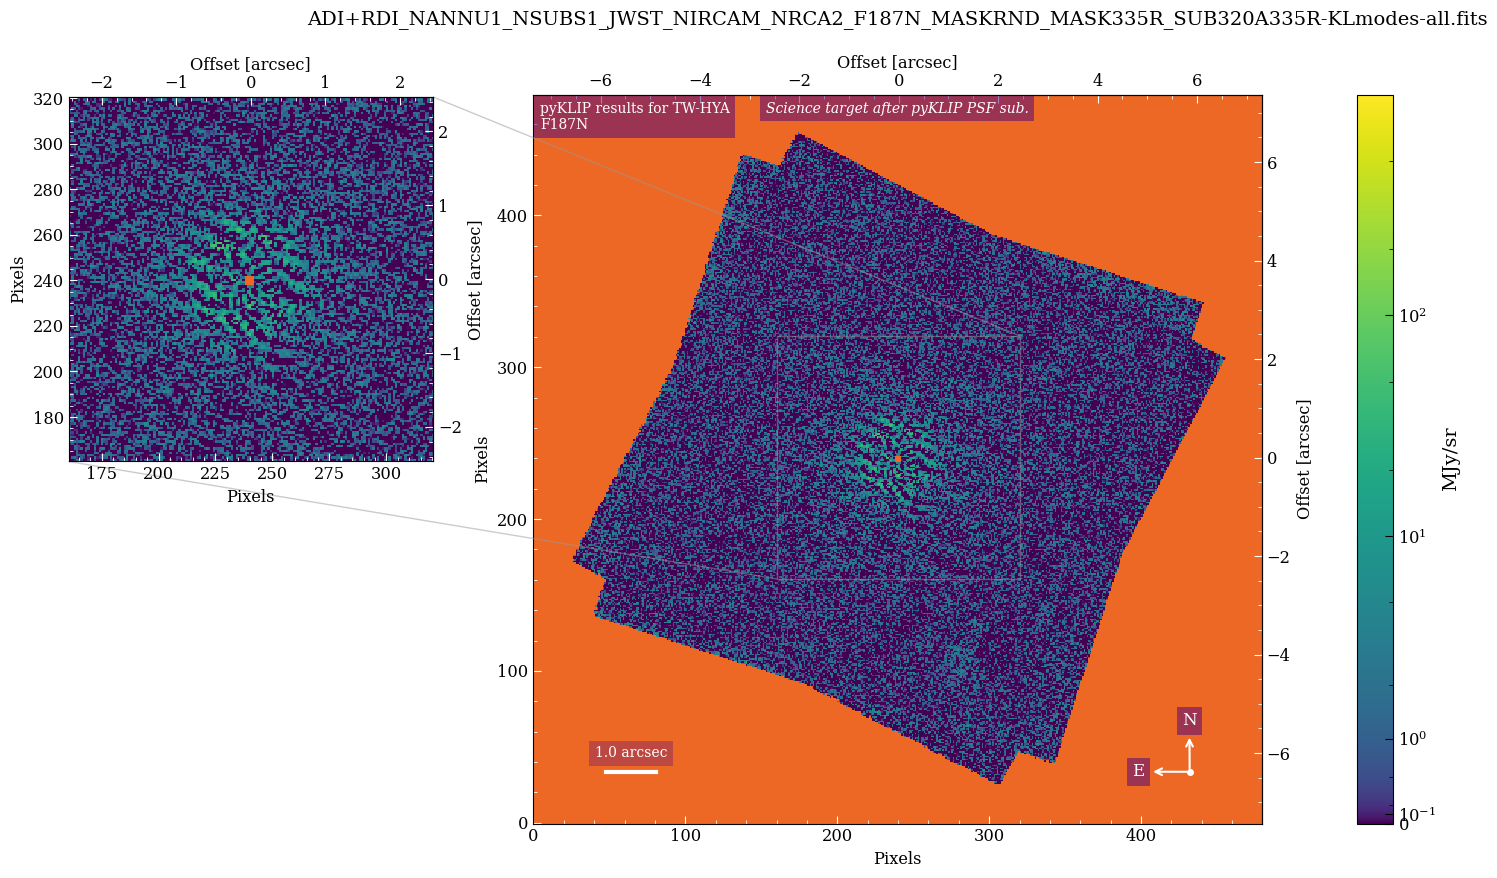

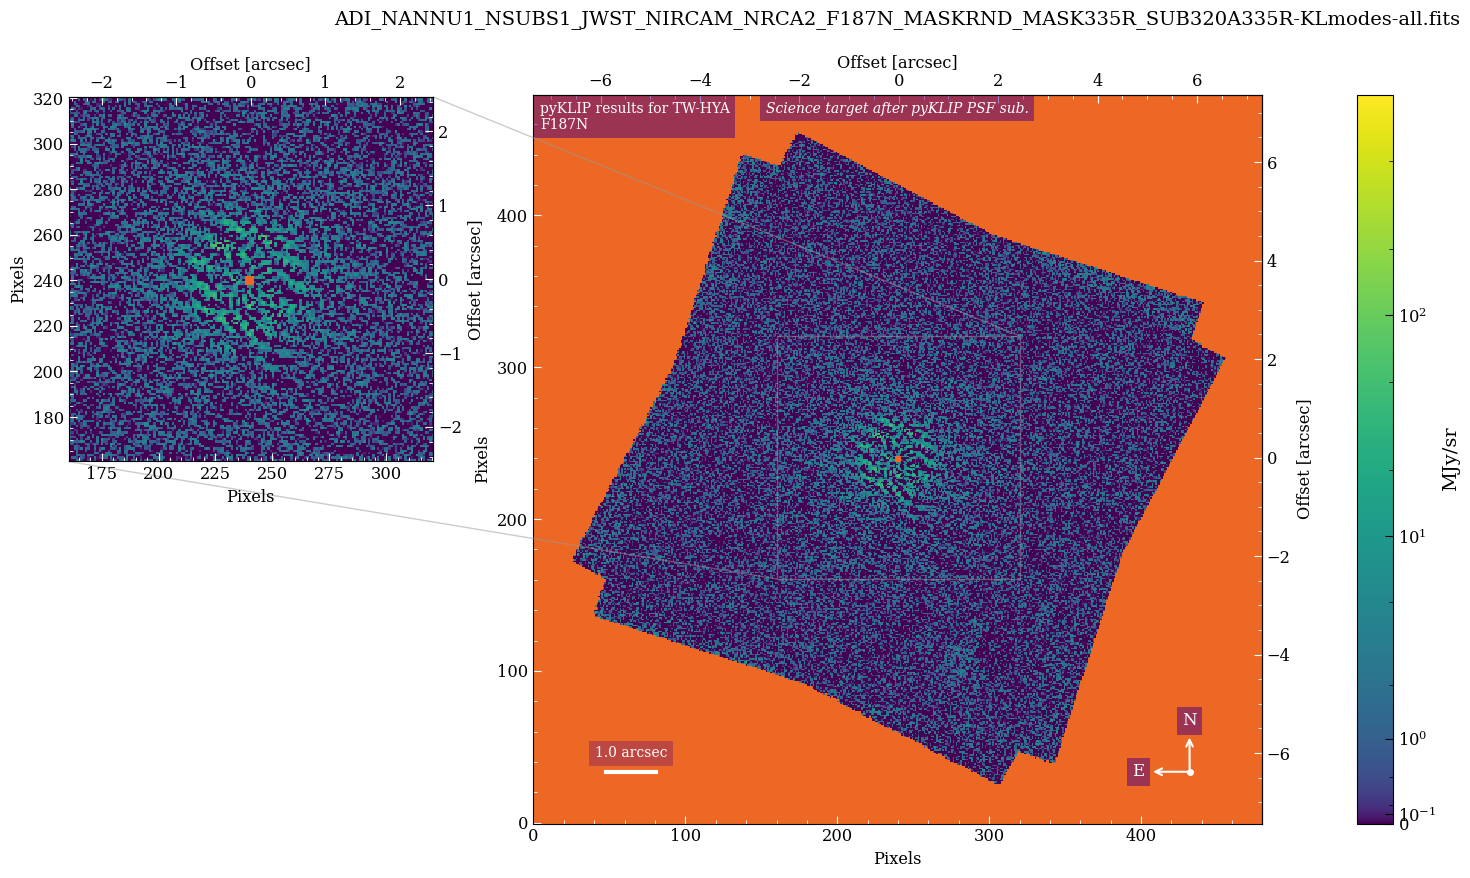

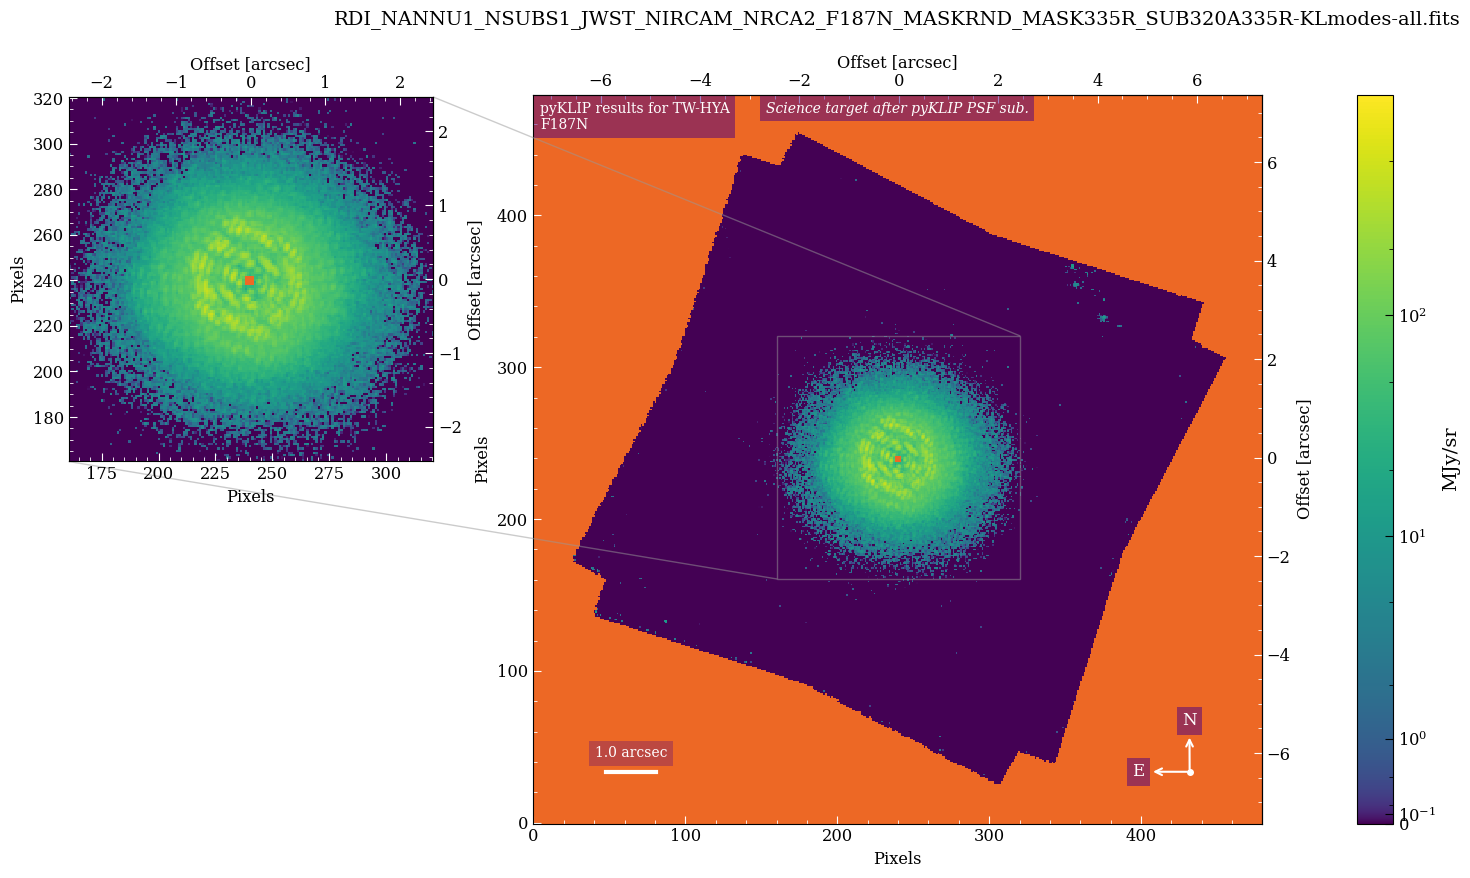

In [33]:
# show the image in PYKLIP output
spaceKLIP.plotting.display_coron_dataset(
    database,
    interactive=False,  # Static or interactive plots?
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    vmin=0, vmax=1e3,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_f187N_klipsub.pdf'  # Save plots to PDF.
)